In [1]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
data= pd.read_csv('D:\Assignment\Association rule\my_movies.csv')

In [3]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
df=pd.get_dummies(data) # the data is not in transaction formation so we using transaction encoder
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
#the items and itemsets with at least 10% support
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True,max_len=3)# Apriori algorithm
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
337,0.1,"(V2_LOTR, V3_Gladiator, V4_Green Mile)"
338,0.1,"(V2_LOTR1, V3_Harry Potter1, V4_Green Mile)"
339,0.1,"(V2_LOTR1, V5_LOTR2, V3_Harry Potter1)"
340,0.1,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)"


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
80,"(Sixth Sense, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
89,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
84,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
81,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
69,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
48,"(Gladiator, Sixth Sense)",(V3_Sixth Sense),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
53,(V3_Sixth Sense),"(Gladiator, Sixth Sense)",0.4,0.5,0.4,1.000000,2.000000,0.20,inf
77,(V1_Gladiator),"(V2_Patriot, Sixth Sense)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
108,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [26]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
80,"(Sixth Sense, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
89,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
84,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
81,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
69,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
48,"(Gladiator, Sixth Sense)",(V3_Sixth Sense),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
53,(V3_Sixth Sense),"(Gladiator, Sixth Sense)",0.4,0.5,0.4,1.000000,2.000000,0.20,inf
77,(V1_Gladiator),"(V2_Patriot, Sixth Sense)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
108,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [27]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
145,"(V2_Patriot, V1_Gladiator)",(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
146,"(V3_Sixth Sense, V1_Gladiator)",(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
147,(V2_Patriot),"(V3_Sixth Sense, V1_Gladiator)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
148,(V3_Sixth Sense),"(V2_Patriot, V1_Gladiator)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf


<ipython-input-29-ceb4b1ba77df>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

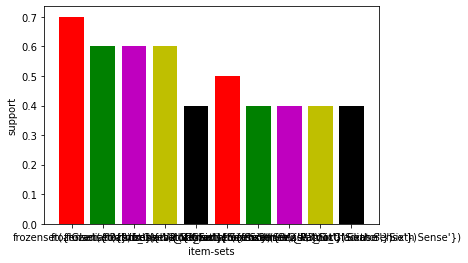

In [29]:
import matplotlib.pyplot as plt 
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')